<a href="https://colab.research.google.com/github/convin305/sum-tudy/blob/master/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0/Chap06%2C07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6
## 6-1

!로 시작하면 리눅스 shell명령으로 이해  
wget : 원격 주소에서 데이터를 다운로드하여 저장  
-0 : 저장할 파일 이름을 지정.

In [ ]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2021-01-31 03:13:43--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-01-31 03:13:43--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-01-31 03:13:43--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... con

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
fruits = np.load('fruits_300.npy')
print(fruits.shape)

(300, 100, 100)


In [ ]:
#첫번째 행에 있는 픽셀 100개
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


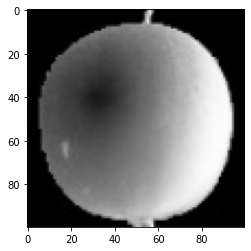

In [ ]:
plt.imshow(fruits[0], 'gray')
plt.show()

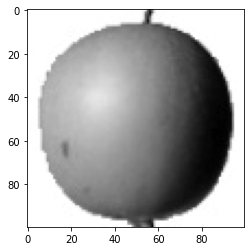

In [ ]:
plt.imshow(fruits[0], 'gray_r')
plt.show()

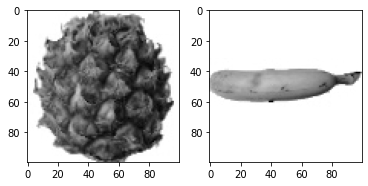

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

픽셀값 분석  
100 * 100 = 10000 * 1 => 배열 계산 시 유용하다. 

In [ ]:
#reshape에서 첫 차원을 -1로 하면 자동으로 남은 차원을 할당한다. 여기서는 샘플개수
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)
print(apple.shape)

(100, 10000)


사과 샘플 100개에 대한 픽셀 평균값

In [ ]:
#axis = 0 : 행을 따라 계산, axis = 1 : 열을 따라 계산
print(apple.shape)

(100, 10000)


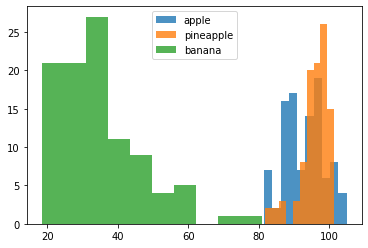

In [ ]:
#alpha : 투명도 조절
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

픽셀 1000개에 대한 평균

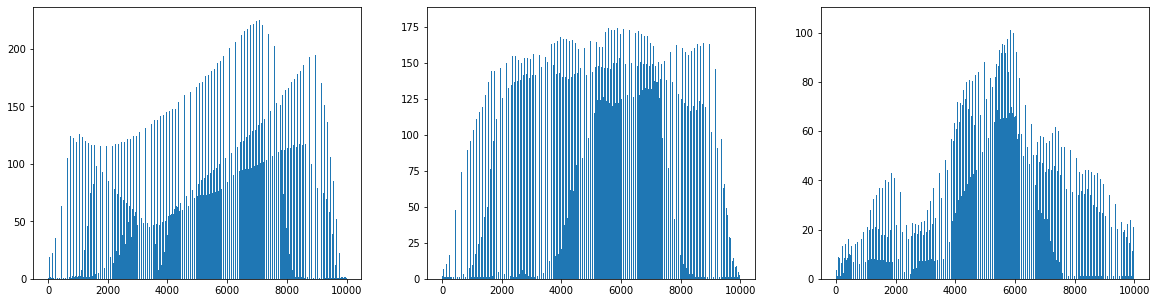

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

픽셀 평균값을 100 * 100 크기로 바꾸어서 이미지로 출력

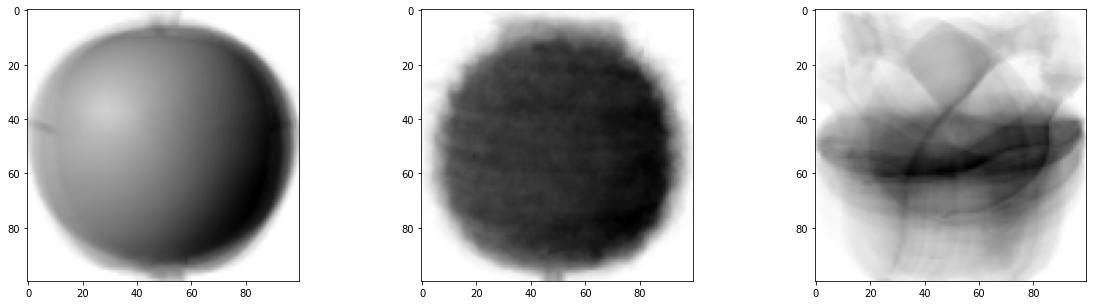

In [ ]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

평균값과 가까운 사진 고르기

In [ ]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


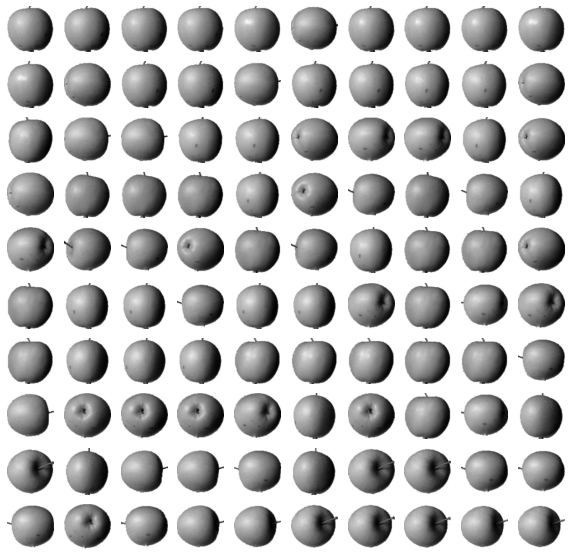

In [ ]:
#apple_mean과 오차가 가장 적은 샘플 100개 선택
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

## 6-2

k-평균 알고리즘  


1.   무작위로 k개의 클러스터 중심을 정함
2.   각 샢믈에서 가장 가까운 클러스타 중심을 찾아 해당 클러스터의 샘플로 지정
3.   클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경
4.   클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복








In [ ]:
fruits = np.load('fruits_300.npy')
#2차원 배열로 변경
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)
#비지도학습이라 타깃데이터 사용 안함

print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


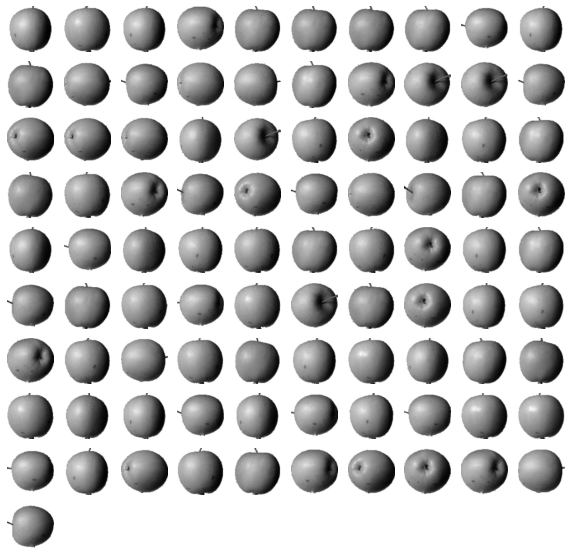

In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    #샘플 개수
    #한 줄에 10개씩 이미지를 그리기. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))
    #행이 1개 이면 열 개수는 샘플 개수, 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    #n개까지만 그린다
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

draw_fruits(fruits[km.labels_==0])

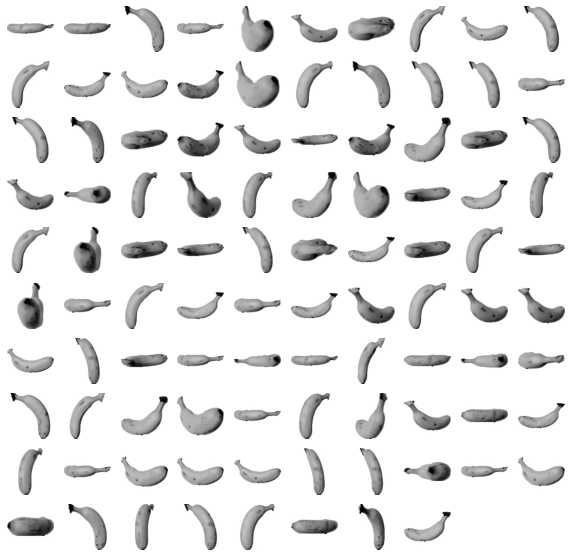

In [ ]:
draw_fruits(fruits[km.labels_==1])

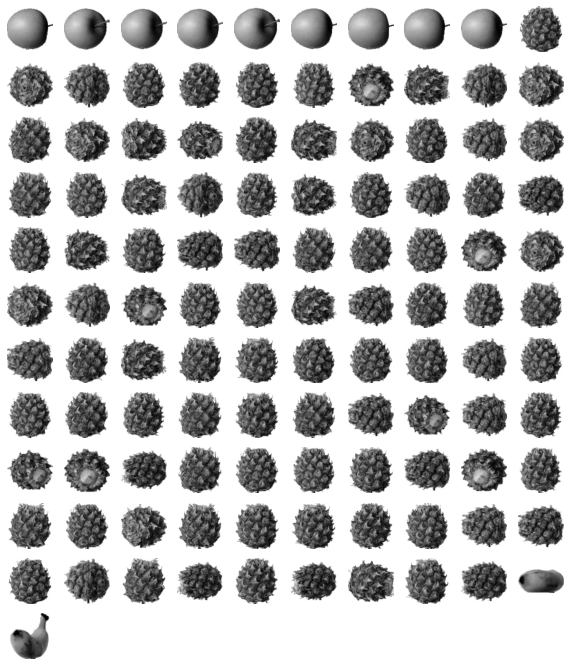

In [ ]:
draw_fruits(fruits[km.labels_==2])

KMeans클래스가 최종적으로 찾은 클러스터 중심 : cluster_centers_에 저장되어 있음  
이미지로 출력하려면 2차원 배열로 변환 필요

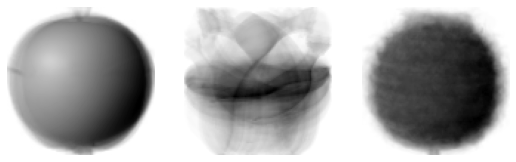

In [ ]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [ ]:
print(km.transform(fruits_2d[100:101]))

[[5267.70439881 8837.37750892 3393.8136117 ]]


In [ ]:
print(km.predict(fruits_2d[100:101]))

[2]


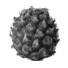

In [ ]:
draw_fruits(fruits[100:101])

알고리즘이 반복한 횟수

In [ ]:
print(km.n_iter_)

3


최적의 K찾기  

* 엘보우 : 적절한 클러스터 개수를 찾기 위한 대표적인 방법,  
클러스터 개수를 늘려가며 이너셔(샘플사이의 거리의 제곱합)의 변화를 관찰하여 찾는다.

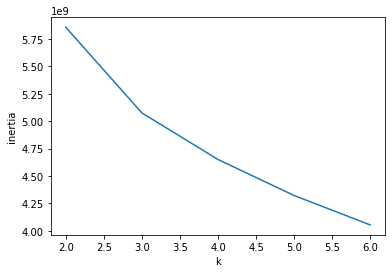

In [ ]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

## 6-3

차원축소 : 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도학습 모델의 성능을 향상시킬 수 있는 방법  

PCA : 주성분분석, 대표적인 차원 축소 알고리즘  
데이터에 있는 분산이 큰 방향을 찾는 것  

PCA클래스

In [ ]:
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

print(pca.components_.shape) #n_components 때문에 첫번째 차원이 50으로 고정, 두번째 차원은 원본 데이터의 특성 개수와 동일

(50, 10000)


원본 데이터에서 분산이 큰 방향을 순서대로 나타낸 것.

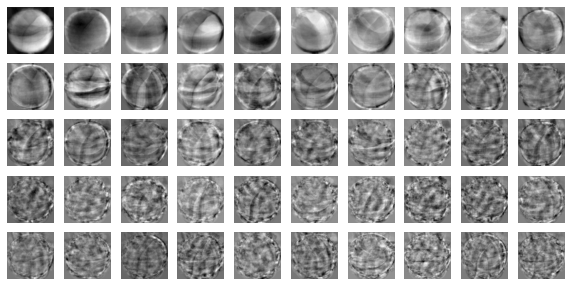

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


원본 데이터 재구성

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


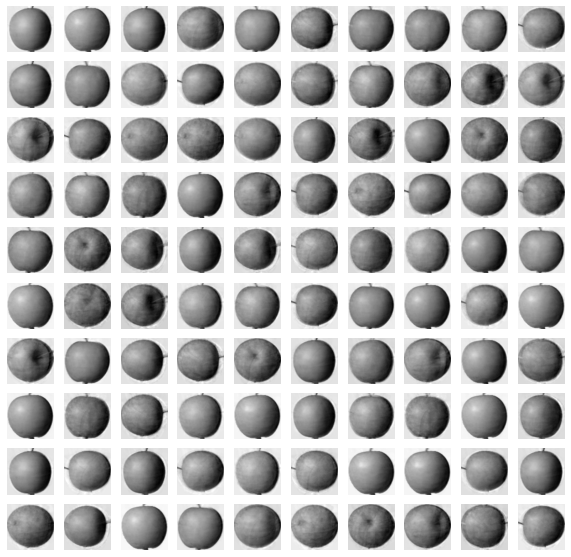

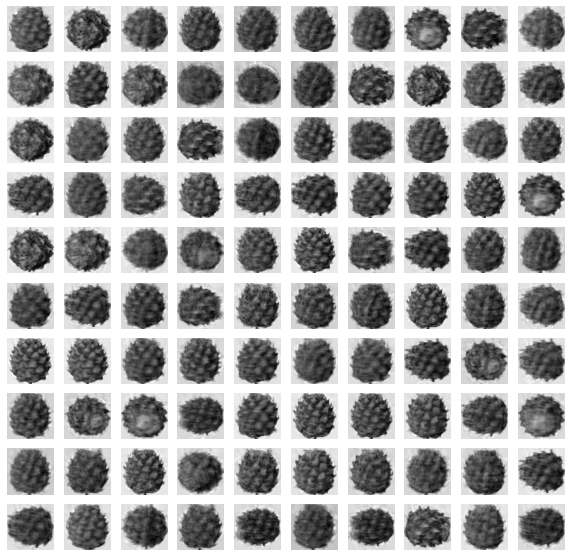

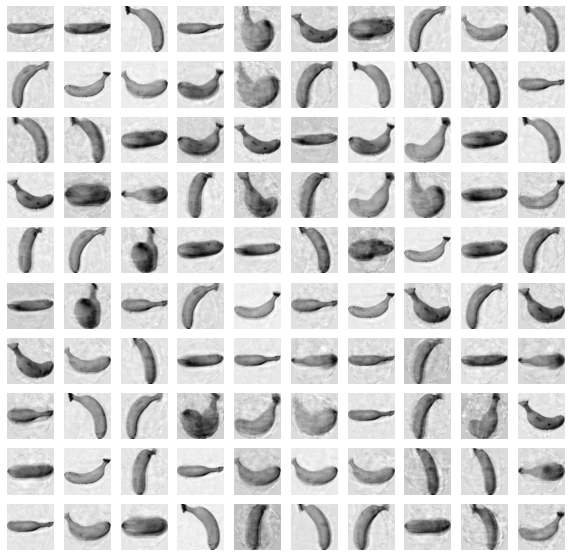

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

설명된 분산 : 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9215843669911354


그래프를 보면, 처음 10개의 주성분이 대부분의 분산을 표현하고 있음을 볼 수 있다. 

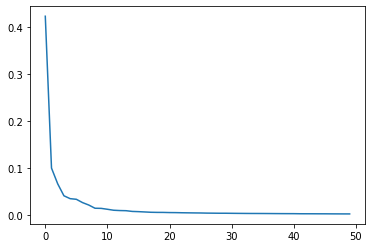

In [ ]:
plt.plot(pca.explained_variance_ratio_)

**로지스틱 회귀 모델과 같이 사용하기** 

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
from sklearn.model_selection import cross_validate #교차검증 수행

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.4842220306396485


In [ ]:
#PCA로 축소한 데이터 사용
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03356094360351562


In [ ]:
#설명된 분산의 50퍼센트에 달하는 주성분 탐색 PCA
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

print(pca.n_components_)

2


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.049460315704345705


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
#차원축소된 데이터 & K-mean알고리즘
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


약간 좀 구분 잘 안됨

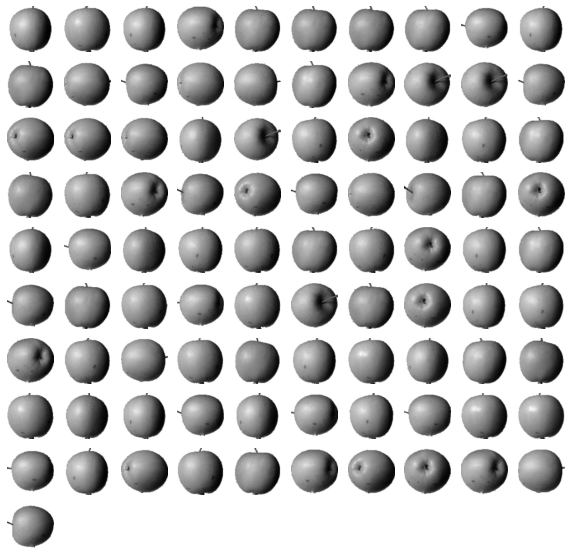

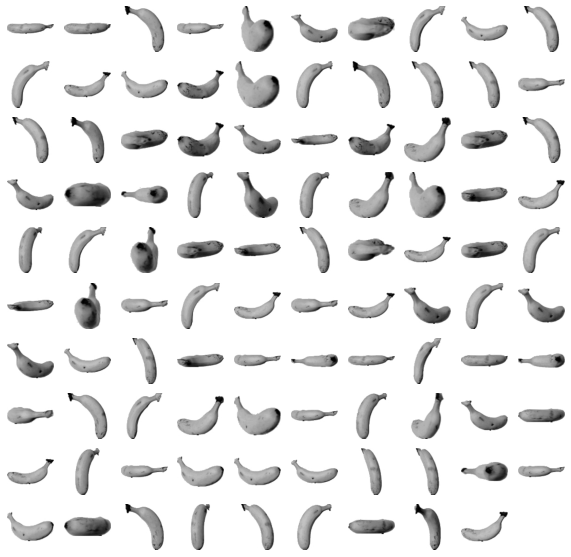

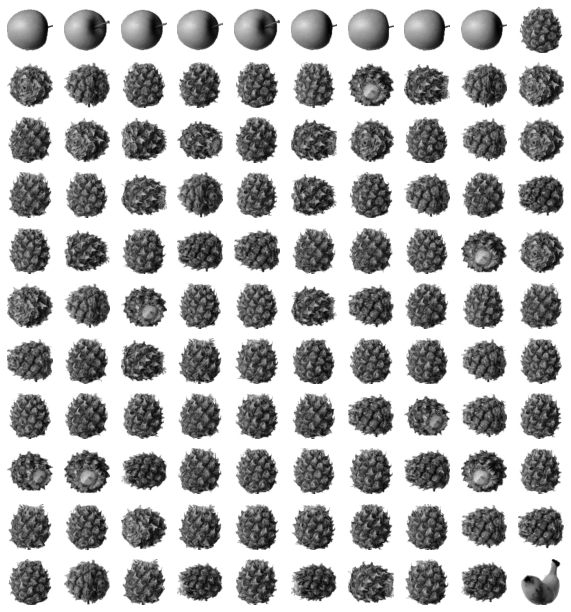

In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

산점도를 살펴보면, 사과와 파인애플의 경계가 가까워 혼동을 일으키기 쉬울 것 같다는 판단이 가능하다.

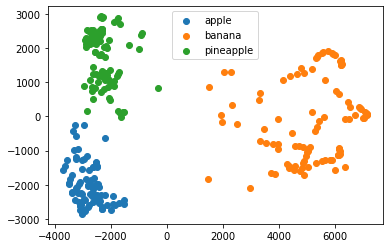

In [ ]:
#클러스터별 산점도

for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

# Chapter7
## 7-1

In [ ]:
from tensorflow import keras

#훈련,테스트셋을 나누어서 반환해준다.
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

print(train_input.shape, train_target.shape), print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


(None, None)

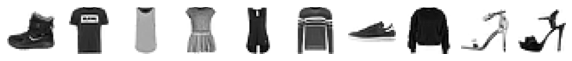

In [ ]:
#이미지로 확인

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [ ]:
#타깃 값을 리스트로 만들어 출력
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
#레이블당 샘플 개수
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


로지스틱 회귀로 패션 아이템 분류하기  
SGDClassifier는 1차원 배열만 입력을 다룰 수 있다.

In [ ]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


인공신경망  
* 뉴런 : z값을 계산하는 단위, 유닛

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

인공신경망에서는 교차검증보다 검증세트를 별도로 덜어내서 사용한다.  
<이유>
* 딥러닝 분야의 데이터 셋은 충분히 크기 때문에 검증 점수가 안정적이고
* 교차검증을 수행하기에 훈련시간이 너무 오래 걸림

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


* 10 : 뉴런의 개수  
* activation : 뉴런의 출력에 적용할 함수 / 이진분류의 경우 sigmoid  
* input_shape : 입력의 크기  

In [ ]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [ ]:
#클래스의 객체를 만들 때 dense를 전달함. 신경망 모델
model = keras.Sequential(dense)

훈련 전 설정 -> compile() 손실함수 지정이 필수적이다.  
* 이진분류 : loss = 'binary_crossentropy'
* 다중분류 : loss = 'categorical_crossentropy'

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

텐서플로우에서는 정수로 된 타깃값을 원핫인코딩으로 바꾸지 않고 그냥 사용이 가능하다.  
sparse_categorical_crossentropy 사용.

In [ ]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7883 - accuracy: 0.7328
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4894 - accuracy: 0.8360
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4616 - accuracy: 0.8461
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4490 - accuracy: 0.8505
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4345 - accuracy: 0.8569


In [ ]:
#성능평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 878us/step - loss: 0.4472 - accuracy: 0.8495


[0.44723233580589294, 0.8495000004768372]

## 7-2

In [ ]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

model = keras.Sequential([dense1, dense2])

* 모델의 이름
* 모델에 들어있는 층이 순서대로 나옴
* 출력크기 (샘플의 개수, 은닉층 뉴런의 개수)
* 모델 파라미터의 개수

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#층을 추가하는 다른 방법

model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Sequential클래스에서 층을 추가할 때 가장 널리 사용하는 방법 : add()

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7565 - accuracy: 0.7557
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4221 - accuracy: 0.8493
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3823 - accuracy: 0.8599
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3523 - accuracy: 0.8741
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3339 - accuracy: 0.8805


렐루 함수  
- max(0,z) : z가 0보다 크면 z를 출력하고, 작으면 0을 출력한다. 
- 신경망에서 뛰어남  

Flatten : 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼침


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28))) #input_shape 매개변수를 flatten으로 옮김(학습층아님)
model.add(keras.layers.Dense(100, activation='relu')) #첫번째 acti를 relu로 바꿈
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6603 - accuracy: 0.7730
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4053 - accuracy: 0.8557
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3589 - accuracy: 0.8740
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3259 - accuracy: 0.8833
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3114 - accuracy: 0.8884


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3896 - accuracy: 0.8676


[0.389576256275177, 0.8675833344459534]

옵티마이저 : 경사하강법 알고리즘

* SGD (미니배치 이용)

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

'''
아래와 동일
sgd = keras.optimizers.SGD() 클래스 객체를 만든 후 사용
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')
'''

"\n아래와 동일\nsgd = keras.optimizers.SGD()\nmodel.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')\n"

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [ ]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [ ]:
#adagrad
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
#RMSprop
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

Adam : 모멘텀 최적화와 RMSprop의 장점을 접목시킴  
적응적 학습률을 사용하기 때문에 에폭이 진행되면서 학습률의 크기를 조정할 수 있다.

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6763 - accuracy: 0.7665
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4027 - accuracy: 0.8575
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3566 - accuracy: 0.8698
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3350 - accuracy: 0.8780
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3027 - accuracy: 0.8895


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3501 - accuracy: 0.8746


[0.3501155972480774, 0.8745833039283752]

## 7-3

In [ ]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = model_fn()

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

#fit의 결과를 history에 담는다
history = model.fit(train_scaled, train_target, epochs=5, verbose=0) #verbose = 0이면 훈련 과정을 나타내지 않는다.

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


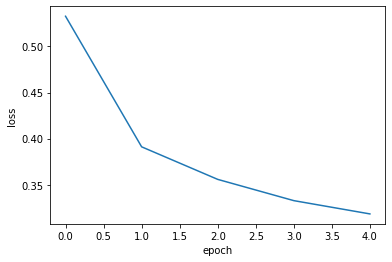

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-01', dpi=300)
plt.show()

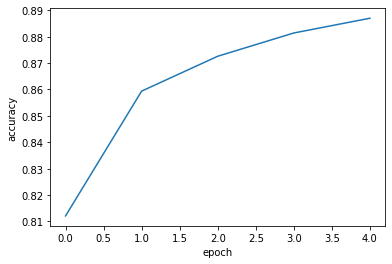

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('7_3-02', dpi=300)
plt.show()

에폭을 20으로 증가

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

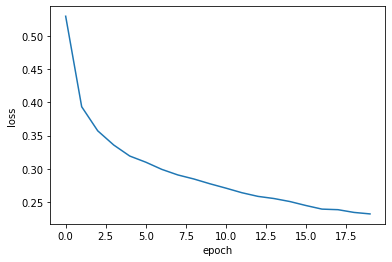

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-03', dpi=300)
plt.show()

검증손실

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


과대적합 모델

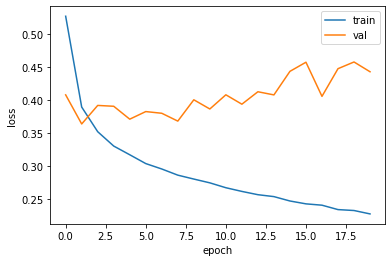

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-04', dpi=300)
plt.show()

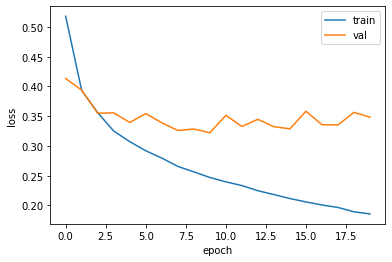

In [ ]:
#ADAM이용
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-05', dpi=300)
plt.show()

Drop out : 과대적합을 막는다.  
훈련이 끝난 뒤 평가나 예측을 할 때에는 적용하지 않는다.

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


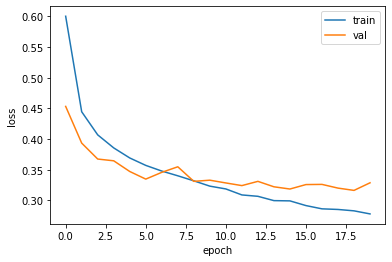

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-06', dpi=300)
plt.show()

In [ ]:
#에폭을 10으로 줄인다.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [ ]:
#모델 저장 -> 확장자가 .h5인 경우 HDF5로 저장한다.
#훈련된 모델의 파라미터를 저장
model.save_weights('model-weights.h5')

In [ ]:
#모델 구조와 모델 파라미터를 함께 저장
model.save('model-whole.h5')

In [ ]:
#저장확인
!ls -al *.h5

-rw-r--r-- 1 root root 332480 Jan 31 04:31 model-weights.h5
-rw-r--r-- 1 root root 981776 Jan 31 04:31 model-whole.h5


In [ ]:
#새로운 모델 생성
model = model_fn(keras.layers.Dropout(0.3))
#저장된 모델 파라미터 적재 -> 저장했던 모델과 같은 구조를 가져야 하는 조건이 있음
model.load_weights('model-weights.h5')

In [ ]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.8839166666666667


In [ ]:
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3274 - accuracy: 0.8839


[0.3273943364620209, 0.8839166760444641]

콜백 : 훈련과정 중간에 어떤 작업을 수행할 수 있게 해주는 객체

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')

model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [ ]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3334 - accuracy: 0.8818


[0.3334387540817261, 0.8818333148956299]

조기종료 : 과대적합이 시작되기 전에 훈련을 미리 중지하는 것

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
print(early_stopping_cb.stopped_epoch)

6


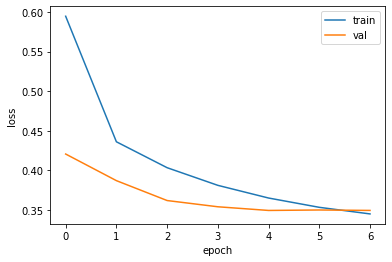

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-07', dpi=300)
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3494 - accuracy: 0.8727


[0.3494206666946411, 0.8727499842643738]